### EM algorithm for Gaussian mixtures

Iteration: 0, last log-likelihood: -2655.991958
Iteration: 1, last log-likelihood: -2655.991958
Iteration: 2, last log-likelihood: -2655.991958
Iteration: 3, last log-likelihood: -2655.991958
Iteration: 4, last log-likelihood: -2655.991958
Iteration: 5, last log-likelihood: -2655.991958
Iteration: 6, last log-likelihood: -2655.991958
Iteration: 7, last log-likelihood: -2655.991958
Iteration: 8, last log-likelihood: -2655.991958
Iteration: 9, last log-likelihood: -2655.991958
Iteration: 10, last log-likelihood: -2655.991958
Iteration: 11, last log-likelihood: -2655.991958
Iteration: 12, last log-likelihood: -2655.991958
Iteration: 13, last log-likelihood: -2655.991958
Iteration: 14, last log-likelihood: -2655.991958
Iteration: 15, last log-likelihood: -2655.991958
Iteration: 16, last log-likelihood: -2655.991958
Iteration: 17, last log-likelihood: -2655.991958
Iteration: 18, last log-likelihood: -2655.991958
Iteration: 19, last log-likelihood: -2655.991958
Iteration: 20, last log-likeli

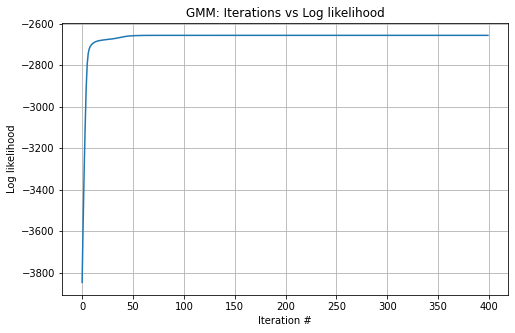

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

class GMM(object):

  def __init__(self, X, cluster_dicts, k):

    self.num_data_points = X.shape[0]
    #print(self.num_data_points)
    self.data = X.copy()
    # number of mixtures
    self.num_mixtures = k

    self.mean_arr = np.zeros(self.num_mixtures)
    self.sigma_arr = np.zeros(self.num_mixtures)
    self.phi = np.zeros(self.num_mixtures)
    self.lambdas = np.empty((self.num_data_points, self.num_mixtures), dtype=float)

    for i in range(k):
      cluster_points = np.array(cluster_dicts[str(i)])
      self.mean_arr[i] = np.mean(cluster_points)
      self.sigma_arr[i] = np.var(cluster_points)
      self.phi[i] = cluster_points.size / self.num_data_points
    
  def fit(self, max_iterations):

    num_iters = 1
    log_likelihood_all = []

    while(num_iters <= max_iterations):

      previous_log_likelihood = self.get_log_likelihood()
      self.e_step()
      self.m_step()
      num_iters += 1
      log_likelihood = self.get_log_likelihood()
      log_likelihood_all.append(log_likelihood)

    return log_likelihood_all
    
  def get_log_likelihood(self):

    log_likelihood = 0
    for i in range(self.num_data_points):
      
      weighted_prob_sum = 0
      for k in range(self.num_mixtures):
        
        normal_dist_denom = math.sqrt (2*math.pi*self.sigma_arr[k])
        normal_dist_num = math.exp(-(self.data[i] - self.mean_arr[k])**2/(2*self.sigma_arr[k]) )

        weighted_prob = (normal_dist_num/normal_dist_denom) * self.phi[k]

        weighted_prob_sum += weighted_prob
      log_likelihood += np.log(weighted_prob_sum) 
    return log_likelihood
        
  def e_step(self):

    for i in range(self.num_data_points):
      den = 0
      for k in range(self.num_mixtures):
          
        normal_dist_denom = math.sqrt(2*math.pi*self.sigma_arr[k])
        normal_dist_num = math.exp(-(self.data[i] - self.mean_arr[k])**2 /(2*self.sigma_arr[k]) )

        num = (normal_dist_num / normal_dist_denom) * self.phi[k]

        den += num
        self.lambdas[i, k] = num
          
      self.lambdas[i, :] /= den
      
      assert self.lambdas[i, :].sum() - 1 < 1e-4
            
  def m_step(self):
    for k in range(self.num_mixtures):
      
      const = self.lambdas[:, k].sum() #sum i = 1 to n (lambda_k ^ i)
      
      self.phi[k] = const / self.num_data_points
      mu_k = 0
      sigma_k = 0
      for i in range(self.num_data_points):
        mu_k += (self.data[i] * self.lambdas[i, k])
        sigma_k += self.lambdas[i, k] * ((self.data[i] - self.mean_arr[k])**2)

      self.mean_arr[k] = mu_k / const
      self.sigma_arr[k] = sigma_k / const


df = pd.read_csv("/content/A2Q1.csv", header=None)

input_data_set = df.iloc[:, :].values

num_clusters = 4;
num_data_points = input_data_set.shape[0]
iterations_per_initialization = 400
num_initializations = 100;

log_likelihood_all_iter = np.empty((num_initializations, iterations_per_initialization))
for init_i in range(num_initializations):

  initial_clusters = {} #initial clusters dict
  for i in range(num_clusters):
    initial_clusters[str(i)] = []

  for i in range(num_data_points):
    cluster_index = np.random.randint(num_clusters)
    initial_clusters[str(cluster_index)].append(input_data_set[i])

  #cluster_dicts, _, _ = kmeans(input_data_set, num_clusters, initial_clusters)

  gmm = GMM(input_data_set, initial_clusters, k=num_clusters)
  cur_log_likelihood = gmm.fit(iterations_per_initialization)
  log_likelihood_all_iter[init_i] = cur_log_likelihood
  print('Iteration: %d, last log-likelihood: %.6f'%(init_i, cur_log_likelihood[-1]))

avg_log_likelihood = np.average(log_likelihood_all_iter, axis = 0) 

plt.figure(figsize=(8, 5))
plt.title('GMM: Iterations vs Log likelihood')
plt.plot(avg_log_likelihood)
plt.xlabel('Iteration #')
plt.ylabel('Log likelihood')

plt.grid()
plt.show()